<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#co2-emmisions-and-life-expectancy-supervised-machine-learning-regression-anlaysis" data-toc-modified-id="co2-emmisions-and-life-expectancy-supervised-machine-learning-regression-anlaysis-1">co2 emmisions and life expectancy supervised machine learning regression anlaysis</a></span><ul class="toc-item"><li><span><a href="#01-Import-libraries-and-data" data-toc-modified-id="01-Import-libraries-and-data-1.1">01 Import libraries and data</a></span></li><li><span><a href="#02-Data-wrangling" data-toc-modified-id="02-Data-wrangling-1.2">02 Data wrangling</a></span></li><li><span><a href="#03-Data-consistency-checks" data-toc-modified-id="03-Data-consistency-checks-1.3">03 Data consistency checks</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3.1">Missing values</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.3.2">Check for duplicates</a></span></li><li><span><a href="#Check-for-extreme-values" data-toc-modified-id="Check-for-extreme-values-1.3.3">Check for extreme values</a></span></li></ul></li><li><span><a href="#04-Data-prep-for-regression-analysis" data-toc-modified-id="04-Data-prep-for-regression-analysis-1.4">04 Data prep for regression analysis</a></span></li><li><span><a href="#05-Regression-analysis" data-toc-modified-id="05-Regression-analysis-1.5">05 Regression analysis</a></span><ul class="toc-item"><li><span><a href="#Compare-how-the-regression-fits-the-training-set" data-toc-modified-id="Compare-how-the-regression-fits-the-training-set-1.5.1">Compare how the regression fits the training set</a></span></li></ul></li><li><span><a href="#06-Regression-Analysis:-Without-Outliers" data-toc-modified-id="06-Regression-Analysis:-Without-Outliers-1.6">06 Regression Analysis: Without Outliers</a></span><ul class="toc-item"><li><span><a href="#find-and-remove-outliers-for-'life_expectancy'-and-'gdp_per_capita-variables" data-toc-modified-id="find-and-remove-outliers-for-'life_expectancy'-and-'gdp_per_capita-variables-1.6.1">find and remove outliers for 'life_expectancy' and 'gdp_per_capita variables</a></span></li><li><span><a href="#regression-analysis-without-outliers" data-toc-modified-id="regression-analysis-without-outliers-1.6.2">regression analysis without outliers</a></span><ul class="toc-item"><li><span><a href="#Compare-how-the-regression-fits-the-training-set" data-toc-modified-id="Compare-how-the-regression-fits-the-training-set-1.6.2.1">Compare how the regression fits the training set</a></span></li></ul></li></ul></li></ul></li></ul></div>

# co2 emmisions and life expectancy supervised machine learning regression anlaysis

## 01 Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# command matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\rober_fjs0dbr\OneDrive\Documents\CF Coursework\Advanced Analytics & Dashboard Design\rc_final_project'

In [4]:
# import carbon data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'carbon_life_full_v03.csv'))

In [5]:
df.head()

,Unnamed: 0,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,...,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag
0,0,Afghanistan,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,...,2024000.0,NaN,0.189251,NaN,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
1,1,Afghanistan,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,...,1914000.0,-5.434783,0.178127,-5.878022,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
2,2,Afghanistan,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,...,1482000.0,-22.570533,0.122912,-30.997549,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
3,3,Afghanistan,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,...,1487000.0,0.337382,0.106186,-13.608116,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
4,4,Afghanistan,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,...,1454000.0,-2.219233,0.094076,-11.404130,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita


## 02 Data wrangling

In [6]:
# Drop 'Unnamed: 0' column from df

df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag
0,Afghanistan,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,NaN,2024000.0,NaN,0.189251,NaN,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
1,Afghanistan,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,-8.228156,1914000.0,-5.434783,0.178127,-5.878022,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
2,Afghanistan,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,-6.221943,1482000.0,-22.570533,0.122912,-30.997549,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
3,Afghanistan,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,-33.206978,1487000.0,0.337382,0.106186,-13.608116,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
4,Afghanistan,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,-27.033834,1454000.0,-2.219233,0.094076,-11.404130,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita


## 03 Data consistency checks

### Missing values

In [8]:
### Check for missing values

df.isnull().sum()

country                  0
year                     0
life_expectancy          0
pct_change_life          1
population               0
pct_change_pop           1
gdp                      0
pct_change_gdp           1
gdp_per_capita           0
pct_change_gdp_capita    1
co2                      0
pct_change_co2           1
co2_per_capita           0
pct_change_co2_capita    1
life_expectancy_flag     0
population_flag          0
gdp_flag                 0
gdp_capita_flag          0
co2_production_flag      0
co2_per_capita_flag      0
dtype: int64

Missing values represent first year of data for % change columns. They will be left as is

### Check for duplicates

In [9]:
dups = df.duplicated()

In [10]:
dups.shape

(4691,)

No duplicates present

### Check for extreme values

C:\Users\rober_fjs0dbr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

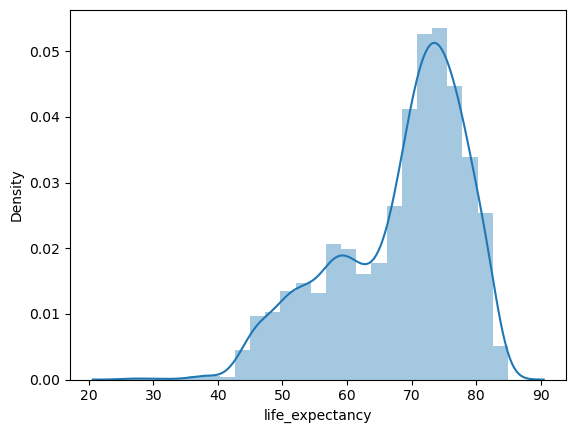

In [15]:
sns.distplot(df['life_expectancy'], bins=25) # Shows extreme values

There does appear to be some extreme values on the low end in terms of life expectancy, for now we will leave the data set as is

In [16]:
df['life_expectancy'].mean() # Check the mean

68.20484099009602

In [17]:
df['life_expectancy'].median() # Check the median

70.94599915

In [18]:
df['life_expectancy'].max() # Check the max

84.93414307

In [19]:
df['life_expectancy'].min() # Check the min

26.17200089

## 04 Data prep for regression analysis

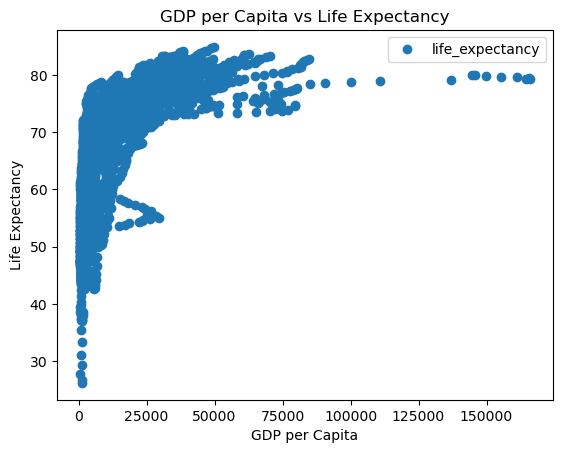

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita', y='life_expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Life Expectancy')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Life Expectancy')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['life_expectancy'].values.reshape(-1,1)

In [22]:
X

array([[1221.7132731 ],
       [1121.188803  ],
       [1051.42907796],
       ...,
       [1450.37168115],
       [1487.8778483 ],
       [1509.10608881]])

In [23]:
y

array([[50.33100128],
       [50.99900055],
       [51.64099884],
       ...,
       [60.29399872],
       [60.81200027],
       [61.19499969]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 05 Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

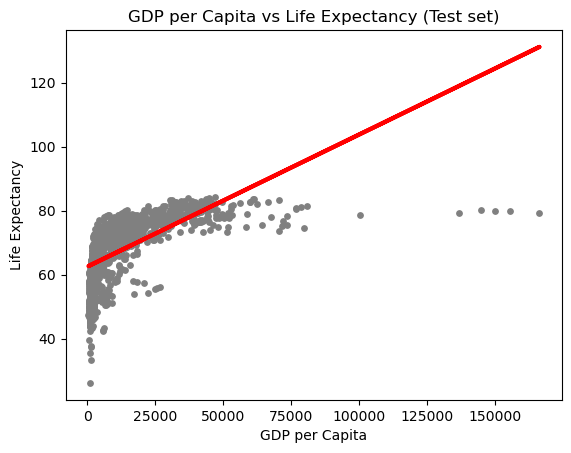

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Life Expectancy (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

This line does not appear to be a good fit. I believe this is because both variables "life_expectancy" and "gdp_per-capita" contain outliers.

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00041315]]
Mean squared error:  63.81956040448324
R2 score:  0.35144021440420536


An R2 score of .35 represents a  weak to moderate relationship. I would like to see what this would look like after removing outliers.

In [31]:
y_predicted

array([[68.97458416],
       [66.39563379],
       [64.96434452],
       ...,
       [80.83712867],
       [64.12696248],
       [63.04574998]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,76.427002,68.974584
1,69.418999,66.395634
2,74.828003,64.964345
3,76.582924,80.942618
4,59.688000,63.096832
5,77.109001,67.963514
6,73.920998,68.679003
7,59.924999,65.024955
8,71.572998,66.786923
9,70.836586,67.132045


### Compare how the regression fits the training set

In [33]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00041315]]
Mean squared error:  60.64604880865154
R2 score:  0.4038508105971059


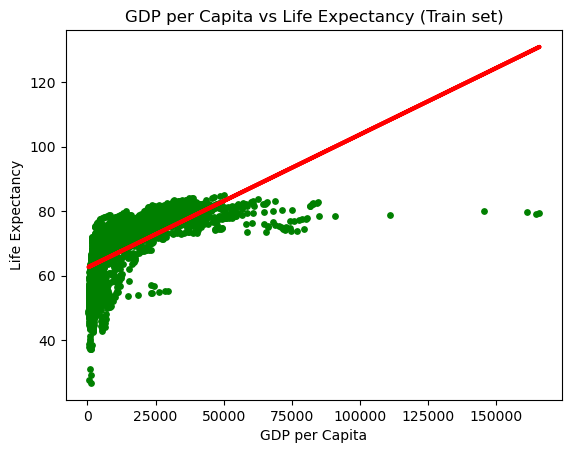

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Life Expectancy (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

## 06 Regression Analysis: Without Outliers

### find and remove outliers for 'life_expectancy' and 'gdp_per_capita variables

In [38]:
# summary stats for df

df.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita
count,4691.000000,4691.000000,4690.000000,4.691000e+03,4690.000000,4.691000e+03,4690.000000,4691.000000,4690.000000,4.691000e+03,4690.000000,4691.000000,4690.000000
mean,2004.016841,68.204841,0.084967,3.951227e+07,70.226759,4.510854e+11,22.422824,13646.447468,4.639735,1.720968e+08,inf,4.938853,inf
std,8.362467,10.040588,3.680540,1.388592e+08,3612.041067,1.507337e+12,562.771698,15841.659142,65.163476,7.127779e+08,NaN,8.506195,NaN
min,1990.000000,26.172001,-54.015979,6.828100e+04,-99.841847,2.571720e+08,-99.959980,365.696469,-97.855035,0.000000e+00,-100.000000,0.000000,-100.000000
25%,1997.000000,61.179501,0.169310,3.619266e+06,0.471030,1.778951e+10,1.754786,2635.831263,0.416151,3.105500e+06,-2.303857,0.527883,-3.432759
50%,2004.000000,70.945999,0.350286,9.330632e+06,1.412886,5.530370e+10,4.140315,7940.043566,2.655741,1.681800e+07,2.207314,2.531885,0.939726
75%,2011.000000,75.683998,0.661984,2.669122e+07,2.484223,2.707835e+11,6.736978,18914.544291,5.137165,7.511400e+07,7.424662,6.953005,5.923646
max,2018.000000,84.934143,38.642072,1.417069e+09,246521.247709,1.815160e+13,30088.083729,166150.487755,3027.309285,1.035388e+10,inf,367.927705,inf


Based on the summary stats above it appears there are outliers in both the life_expectancy and gdp-per_capita columns

In [57]:
#create a function to find outliers using IQR

for x in ['life_expectancy']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [58]:
for x in ['gdp_per_capita']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [59]:
df.isnull().sum()

country                    0
year                       0
life_expectancy           17
pct_change_life            1
population                 0
pct_change_pop             1
gdp                        0
pct_change_gdp             1
gdp_per_capita           235
pct_change_gdp_capita      1
co2                        0
pct_change_co2             1
co2_per_capita             0
pct_change_co2_capita      1
life_expectancy_flag       0
population_flag            0
gdp_flag                   0
gdp_capita_flag            0
co2_production_flag        0
co2_per_capita_flag        0
dtype: int64

In [60]:
# drop null from life_expectancy and gdp_per_capita variables

df = df.dropna(subset=['life_expectancy', 'gdp_per_capita'])

df.isnull().sum()

country                  0
year                     0
life_expectancy          0
pct_change_life          1
population               0
pct_change_pop           1
gdp                      0
pct_change_gdp           1
gdp_per_capita           0
pct_change_gdp_capita    1
co2                      0
pct_change_co2           1
co2_per_capita           0
pct_change_co2_capita    1
life_expectancy_flag     0
population_flag          0
gdp_flag                 0
gdp_capita_flag          0
co2_production_flag      0
co2_per_capita_flag      0
dtype: int64

### regression analysis without outliers

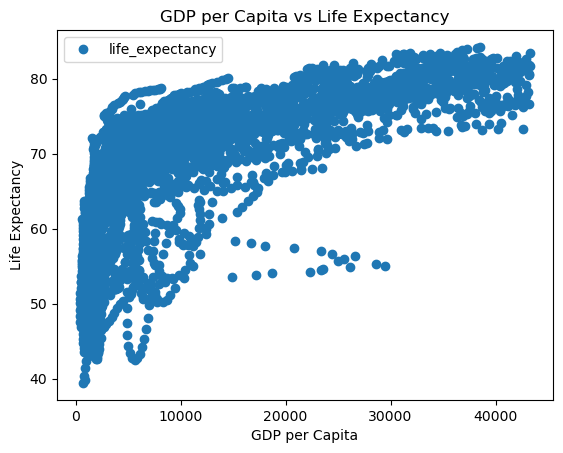

In [65]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita', y='life_expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Life Expectancy')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Life Expectancy')  
plt.show()

In [66]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['life_expectancy'].values.reshape(-1,1)

In [67]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# Create a regression object.

regression = LinearRegression()  

In [69]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

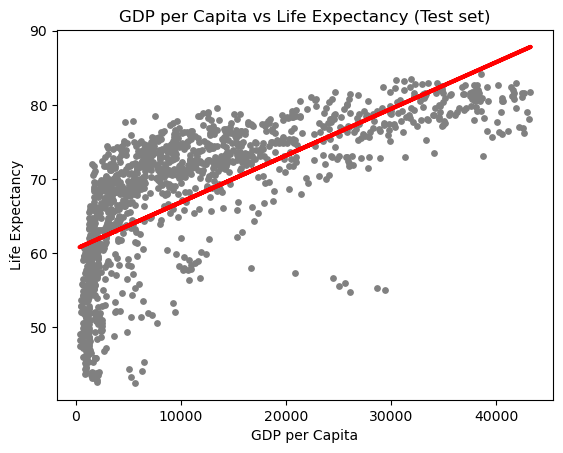

In [71]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Life Expectancy (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

This line appears to be a better fit when the outliers are removed from the life_expectancy and gdp_per_capita variables

In [72]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [73]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00062968]]
Mean squared error:  47.78758512568868
R2 score:  0.4852377673720699


In [74]:
y_predicted

array([[62.00733823],
       [80.58184289],
       [80.28563997],
       ...,
       [62.03227403],
       [64.49036963],
       [74.96674468]])

In [75]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44.009998,62.007338
1,82.448784,80.581843
2,72.931000,80.285640
3,71.463997,78.087550
4,72.949997,75.906748
5,59.101002,61.535730
6,66.370003,62.079911
7,73.662003,66.556350
8,71.813004,67.744255
9,76.229271,74.127581


#### Compare how the regression fits the training set

In [76]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [77]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00062968]]
Mean squared error:  47.938521645496856
R2 score:  0.4976674872967819


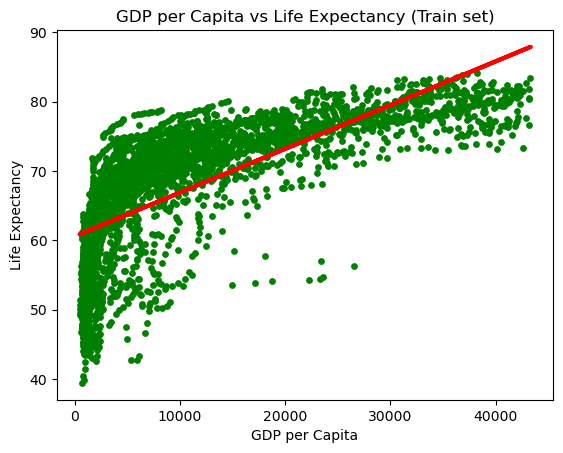

In [79]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Life Expectancy (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

While removing the outliers from both variables did improve the model and there dies appear to be a relationship between gdp_per_capita and life_expectancy within countries, other variables must exist that also influence life expectancy in a country. I would be interested to see how gdp_per_capita is effected by co2 production in the lower incomem middle income, and high income countries. I cannot suggest this model to be a good indicator of life expectancy ina a country based on gdp_per_capita.